# Log plotter file of the application 1D


## 1. load all the data from the log file

the log file is organized as follow :
| **Ball's Position (x, y)** | **Player's Position (x, y)** | **Mouse Movement (dx, dy)** | **Score** | **Time** |
|----------------------------|-----------------------------|-----------------------------|-----------|----------|
| (150, 200)                 | (120, 180)                  | (20, 10)                    | 10        | 00:15    |
| (300, 400)                 | (280, 370)                  | (30, 15)                    | 20        | 00:30    |
| (450, 600)                 | (420, 570)                  | (30, 20)                    | 30        | 00:45    |
| (600, 800)                 | (580, 770)                  | (20, 30)                    | 40        | 01:00    |

In [1]:
import pandas
import os
import sys
# Add the parent directory (two levels up) to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns

# load the data from log file
# enter the wanted file path here
file_path = "environment/logs/dataset_test/cos_with_jittering_joao.log"
# file_path = "logs/random_example.log"
# file_path = "logs/application24_11_05_10_26_17.log"

# log_file_path = "environment/logs/application24_11_07_11_33_46.log"
bx, by, px, py, mdx, mdy, score, time, dbx, dby, dataframe = read_data(file_path)

df_dbx = dbx.copy()
df_dbx.insert(0, 0)

dataframe.drop(columns=['Unnamed: 8'], inplace=True)
# dataframe.insert(0,'dBy',dby)
dataframe.insert(0,'dBx',df_dbx)
dataframe.drop(columns=['Bx', 'By', 'Py', 'Score', 'Time'], inplace=True)


# Data plotting 

plot of the x movement of the ball and player

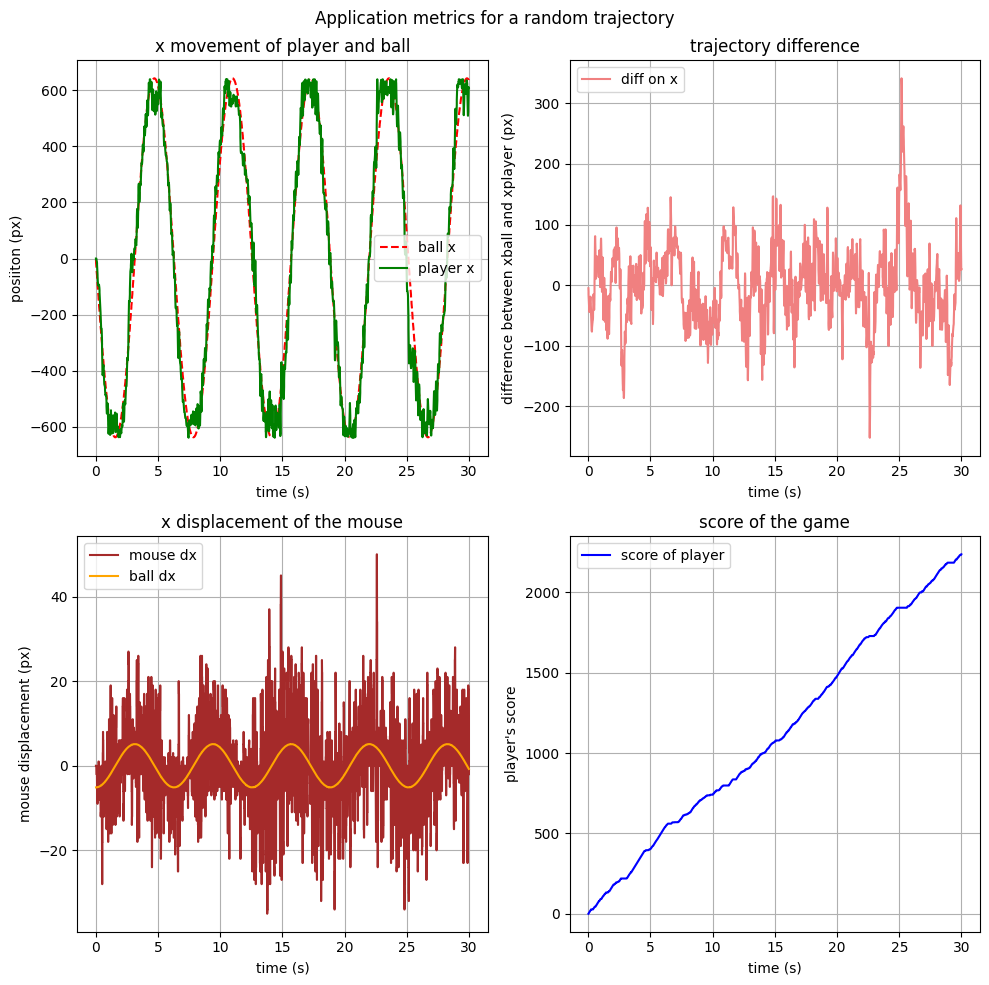

In [2]:
import matplotlib.pyplot as plt

title = "random"
# plt.style.use('dark_background')
# plt.style.context('Solarize_Light2')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

fig.suptitle(f"Application metrics for a {title} trajectory")
# ax = axs[0]
axs[0, 0].set_title('x movement of player and ball')
axs[0, 0].plot(time, bx, 'r--', label='ball x')
axs[0, 0].plot(time, px, 'g-', label='player x')
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("posiiton (px)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# ax = axs[0,1]
axs[0,  1].set_title('trajectory difference')
axs[0,  1].plot(time, bx-px, 'lightcoral', label='diff on x')
axs[0,  1].set_xlabel("time (s)")
axs[0,  1].set_ylabel("difference between xball and xplayer (px)")
axs[0,  1].legend()
axs[0,  1].grid(True)


# ax = axs[1,0]
axs[1,  0].set_title('x displacement of the mouse')
axs[1,  0].plot(time, mdx, 'brown', linestyle='-', label='mouse dx')
axs[1,  0].plot(time[1:], dbx, 'orange', label='ball dx')
axs[1,  0].set_xlabel("time (s)")
axs[1,  0].set_ylabel("mouse displacement (px)")
axs[1,  0].legend()
axs[1,  0].grid(True)

# ax = axs[1,1]
axs[1, 1].set_title('score of the game')
axs[1, 1].plot(time, score, 'b', label='score of player')
axs[1, 1].set_xlabel("time (s)")
axs[1, 1].set_ylabel("player's score")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
# plt.savefig("../doc/images/plots/" + title + ".png")

# STATISTCAL STUFF

<Axes: title={'center': 'Kendall correlation'}>

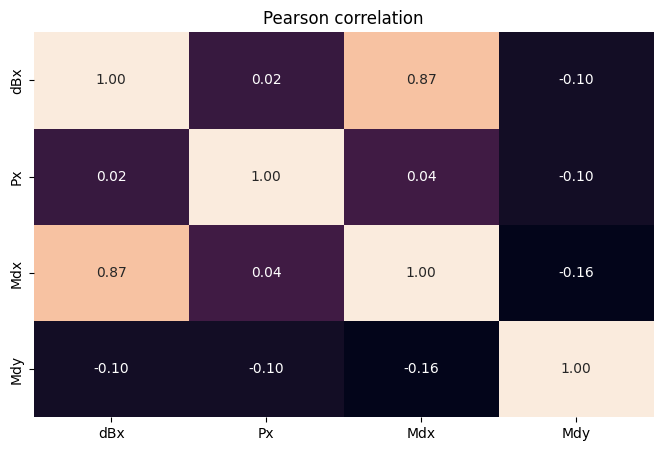

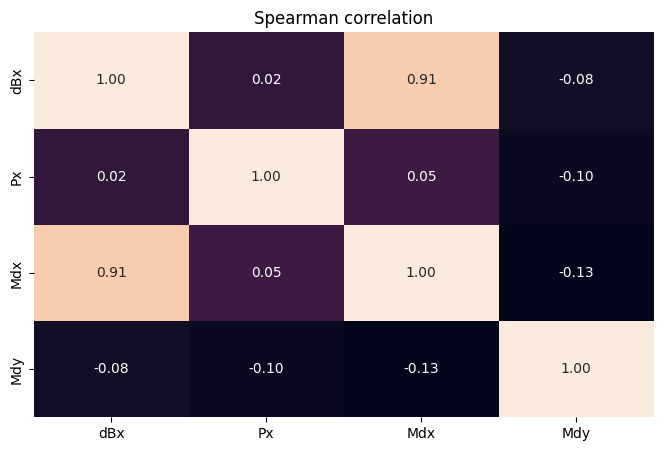

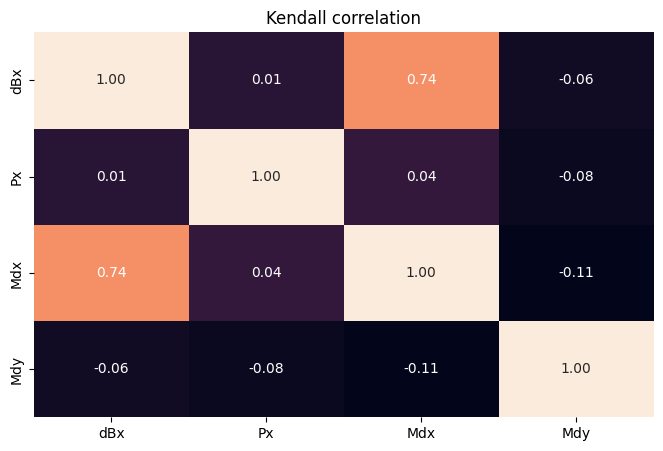

In [6]:
# from statsmodels.tsa.stattools import grangercausalitytests


log_file_path = "environment/logs/dataset_test/normal_log_with_no_impairments_joao.log"


# dataframe.insert(-1,'dBy',dby.append(0))
# Finding correlation between features and plotting them

plt.figure(figsize = (8,5))
plt.title("Pearson correlation")
sns.heatmap(dataframe.corr(method='pearson',numeric_only=True), cbar = False, annot = True, fmt=".2f")

plt.figure(figsize = (8,5))
plt.title("Spearman correlation")
sns.heatmap(dataframe.corr(method='spearman',numeric_only=True), cbar = False, annot = True, fmt=".2f")

plt.figure(figsize = (8,5))
plt.title("Kendall correlation")
sns.heatmap(dataframe.corr(method='kendall',numeric_only=True), cbar = False, annot = True, fmt=".2f")

# max_lag = 10
# result = grangercausalitytests(dataframe[['Mdy', 'Mdx']], max_lag, verbose=True)

cov matrix : 
 [[4.17484925 0.07331658]
 [0.07331658 0.37778894]] 

Eigenvector: 
 [[ 0.99981378 -0.01929799]
 [ 0.01929799  0.99981378]] 

Eigenvalues: 
 [4.17626437 0.37637382] 



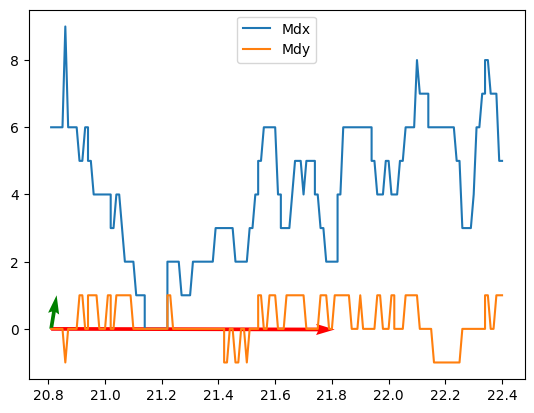

In [7]:
l = 2600
u = 2800
T = np.array([[0, 1], [1, 0]])  

xy = dataframe[['Mdx', 'Mdy']]
xy = np.array(xy)

plt.plot(time[l:u], xy[l:u:, 0])
plt.plot(time[l:u], xy[l:u, 1])
plt.legend(['Mdx', 'Mdy'])

cov_matrix = np.cov(xy[l:u, :].T)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("cov matrix : \n",cov_matrix, "\n" )
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

origin = origin = np.array([[time[l], time[l]],[0, 0]]) # origin point
plt.quiver(*origin, eigen_vectors[:, 0], eigen_vectors[:, 1], angles='xy', scale_units='xy', scale=1, color=['red', 'green'])

## 2. write commande from naive ( dx and dy from gt )

In [ ]:
# write the dx and dy to a file computed by follow objext displacement
import numpy as np

file_name = "../environment/input/linear_input.in"

dby = np.array(dbx)*0

with open(file_name, 'w') as f:
    f.write("dx;dy\n")
    for i in range(len(dbx)):
        f.write(f"{dbx[i]};{dby[i]}\n")



In [ ]:
import scipy.fftpack

# fft of dx
sig = np.array(mdx)
Npoint = len(mdx)
t = time
T = time[1]-time[0]
yf = scipy.fftpack.fft(sig)
xf = np.linspace(0.0, 1.0/(2.0*0.008), Npoint//2)

plt.plot(xf[0:Npoint//2], 2.0/Npoint * np.abs(yf[0:Npoint//2]))



In [ ]:
file1 = "environment/logs/application24_11_13_15_53_03.log"
file2 = "environment/logs/application24_11_13_15_54_31.log"

bx1, by1, px1, py1, mdx1, mdy1, score1, time1, dbx1, dby1 = read_data(file1)
bx2, by2, px2, py2, mdx2, mdy2, score2, time2, dbx2, dby2 = read_data(file2)

plt.plot(time1, bx1, 'brown', linestyle='-', label='ball traj 1')
plt.plot(time2, bx2, 'green', linestyle='-', label='ball traj 2')
plt.plot(time2, bx2 - bx1, 'red', linestyle='-', label='diff')

plt.legend()

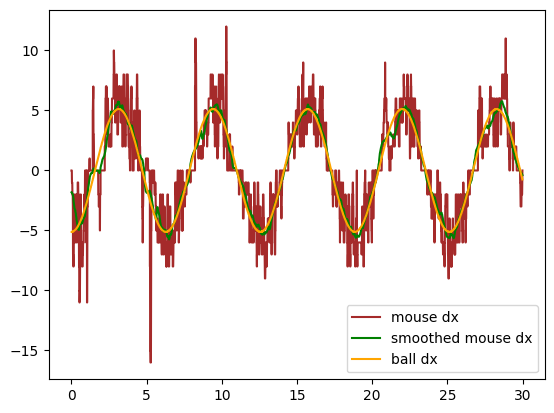

In [8]:


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

smdx = smooth(mdx, 100)

plt.plot(time, mdx, 'brown', linestyle='-', label='mouse dx')
plt.plot(time, smdx, 'green', linestyle='-', label='smoothed mouse dx')
plt.plot(time[1:], dbx, 'orange', label='ball dx')
plt.legend()


In [ ]:
# from controller.common.tools import write_to_file

# file_name = "../environment/input/smooth_input.in"
# dby.insert(0, 0)
# write_to_file(file_name, smdx.tolist(), dby )


In [ ]:
smdx.tolist()